In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Feature Engineering and Data Preparation
from sklearn.preprocessing import LabelEncoder, StandardScaler
# import numpy as np
# from google.colab import drive
#Linear

In [3]:
#Logistic Regression
df_dropout=pd.read_csv('data.csv')
df_dropout

,"Marital status;Application mode;Application order;Course;""Daytime/evening attendance\t"";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target"
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...
...,...
4419,1;1;6;9773;1;1;125.0;1;1;1;5;4;122.2;0;0;0;1;1...
4420,1;1;2;9773;1;1;120.0;105;1;1;9;9;119.0;1;0;1;0...
4421,1;1;1;9500;1;1;154.0;1;37;37;9;9;149.5;1;0;0;1...
4422,1;1;1;9147;1;1;180.0;1;37;37;7;4;153.8;1;0;0;1...


In [4]:
# Read the CSV file with semicolon separator and specify column names
df_dropout = pd.read_csv('data.csv', sep=';')

# Rename columns to be more readable and consistent
column_names = {
    'Marital status': 'marital_status',
    'Application mode': 'application_mode',
    'Application order': 'application_order',
    'Course': 'course',
    'Daytime/evening attendance\t': 'daytime_evening',
    'Previous qualification': 'prev_qualification',
    'Previous qualification (grade)': 'prev_qualification_grade',
    'Nacionality': 'nationality',
    "Mother's qualification": 'mother_qualification',
    "Father's qualification": 'father_qualification',
    "Mother's occupation": 'mother_occupation',
    "Father's occupation": 'father_occupation',
    'Admission grade': 'admission_grade',
    'Displaced': 'displaced',
    'Educational special needs': 'special_needs',
    'Debtor': 'debtor',
    'Tuition fees up to date': 'tuition_up_to_date',
    'Gender': 'gender',
    'Scholarship holder': 'scholarship_holder',
    'Age at enrollment': 'age_enrollment',
    'International': 'international',
    'Curricular units 1st sem (credited)': 'curr_units_1st_credited',
    'Curricular units 1st sem (enrolled)': 'curr_units_1st_enrolled',
    'Curricular units 1st sem (evaluations)': 'curr_units_1st_evaluations',
    'Curricular units 1st sem (approved)': 'curr_units_1st_approved',
    'Curricular units 1st sem (grade)': 'curr_units_1st_grade',
    'Curricular units 1st sem (without evaluations)': 'curr_units_1st_without_eval',
    'Curricular units 2nd sem (credited)': 'curr_units_2nd_credited',
    'Curricular units 2nd sem (enrolled)': 'curr_units_2nd_enrolled',
    'Curricular units 2nd sem (evaluations)': 'curr_units_2nd_evaluations',
    'Curricular units 2nd sem (approved)': 'curr_units_2nd_approved',
    'Curricular units 2nd sem (grade)': 'curr_units_2nd_grade',
    'Curricular units 2nd sem (without evaluations)': 'curr_units_2nd_without_eval',
    'Unemployment rate': 'unemployment_rate',
    'Inflation rate': 'inflation_rate',
    'GDP': 'gdp',
    'Target': 'target'
}

# Rename the columns
df_dropout = df_dropout.rename(columns=column_names)

# Display the first few rows of the restructured dataset
print("Shape of dataset:", df_dropout.shape)
df_dropout.head()

Shape of dataset: (4424, 37)


,marital_status,application_mode,application_order,course,daytime_evening,prev_qualification,prev_qualification_grade,nationality,mother_qualification,father_qualification,...,curr_units_2nd_credited,curr_units_2nd_enrolled,curr_units_2nd_evaluations,curr_units_2nd_approved,curr_units_2nd_grade,curr_units_2nd_without_eval,unemployment_rate,inflation_rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# Recode target variable to binary categorical (Dropout or Not-Dropout)
# First ensure we're working with the original string values
print("Before recoding - unique values:", df_dropout['target'].unique())

# Create binary target with text labels (Dropout vs Not-Dropout)
df_dropout['target_binary'] = df_dropout['target'].apply(lambda x: "Dropout" if x == 'Dropout' else "Not-Dropout")

# Verify the new binary column
print("After recoding - unique values in target_binary:", df_dropout['target_binary'].unique())

# Replace the original target column if desired
df_dropout['target'] = df_dropout['target_binary']
df_dropout = df_dropout.drop('target_binary', axis=1)

# Verify the change
print("Final target values:", df_dropout['target'].unique())
df_dropout['target']

Before recoding - unique values: ['Dropout' 'Graduate' 'Enrolled']
After recoding - unique values in target_binary: ['Dropout' 'Not-Dropout']
Final target values: ['Dropout' 'Not-Dropout']


0           Dropout
1       Not-Dropout
2           Dropout
3       Not-Dropout
4       Not-Dropout
           ...     
4419    Not-Dropout
4420        Dropout
4421        Dropout
4422    Not-Dropout
4423    Not-Dropout
Name: target, Length: 4424, dtype: object

In [6]:
df_target = df_dropout['target']
df_dropout.drop(columns=['target'], inplace=True)
df_target
df_dropout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marital_status               4424 non-null   int64  
 1   application_mode             4424 non-null   int64  
 2   application_order            4424 non-null   int64  
 3   course                       4424 non-null   int64  
 4   daytime_evening              4424 non-null   int64  
 5   prev_qualification           4424 non-null   int64  
 6   prev_qualification_grade     4424 non-null   float64
 7   nationality                  4424 non-null   int64  
 8   mother_qualification         4424 non-null   int64  
 9   father_qualification         4424 non-null   int64  
 10  mother_occupation            4424 non-null   int64  
 11  father_occupation            4424 non-null   int64  
 12  admission_grade              4424 non-null   float64
 13  displaced         

In [7]:
df_target.info()
df_target.head()


<class 'pandas.core.series.Series'>
RangeIndex: 4424 entries, 0 to 4423
Series name: target
Non-Null Count  Dtype 
--------------  ----- 
4424 non-null   object
dtypes: object(1)
memory usage: 34.7+ KB


0        Dropout
1    Not-Dropout
2        Dropout
3    Not-Dropout
4    Not-Dropout
Name: target, dtype: object

In [8]:
# Convert categorical target to numeric binary values
le = LabelEncoder()
df_target_numeric = le.fit_transform(df_target)

# Verify the encoding
print("Original values:", df_target.unique())
print("Encoded values:", np.unique(df_target_numeric))
print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Create a DataFrame from the encoded values
df_target = pd.Series(df_target_numeric, index=df_target.index)

# Display the first few values of the encoded target
df_target

Original values: ['Dropout' 'Not-Dropout']
Encoded values: [0 1]
Mapping: {'Dropout': 0, 'Not-Dropout': 1}


0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Length: 4424, dtype: int32

In [9]:
df_target = pd.DataFrame(df_target, columns=['Student_Status'])
df_target

,Student_Status
0,0
1,1
2,0
3,1
4,1
...,...
4419,1
4420,0
4421,0
4422,1


In [10]:
# 1. Handle missing values
print("\nMissing values before cleaning:")
print(df_dropout.isnull().sum())




Missing values before cleaning:
marital_status                 0
application_mode               0
application_order              0
course                         0
daytime_evening                0
prev_qualification             0
prev_qualification_grade       0
nationality                    0
mother_qualification           0
father_qualification           0
mother_occupation              0
father_occupation              0
admission_grade                0
displaced                      0
special_needs                  0
debtor                         0
tuition_up_to_date             0
gender                         0
scholarship_holder             0
age_enrollment                 0
international                  0
curr_units_1st_credited        0
curr_units_1st_enrolled        0
curr_units_1st_evaluations     0
curr_units_1st_approved        0
curr_units_1st_grade           0
curr_units_1st_without_eval    0
curr_units_2nd_credited        0
curr_units_2nd_enrolled        0
curr_units

In [11]:
# Fill missing numerical values with median
numeric_columns = df_dropout.select_dtypes(include=['float64', 'int64']).columns
df_dropout[numeric_columns] = df_dropout[numeric_columns].fillna(df_dropout[numeric_columns].median())



In [12]:
# 2. Convert categorical target to numeric
le = LabelEncoder()
df_target['Student_Status'] = le.fit_transform(df_target['Student_Status'])
# Now 'Dropout' = 0, 'Graduate' = 1
df_target['Student_Status']
print("Unique values in target column:", df_target['Student_Status'].unique())
df_target

Unique values in target column: [0 1]


,Student_Status
0,0
1,1
2,0
3,1
4,1
...,...
4419,1
4420,0
4421,0
4422,1


In [13]:
df_binaryFlags = df_dropout[['daytime_evening', 'debtor', 'tuition_up_to_date']]
df_binaryFlags



,daytime_evening,debtor,tuition_up_to_date
0,1,0,1
1,1,0,0
2,1,0,0
3,1,0,1
4,0,0,1
...,...,...,...
4419,1,0,1
4420,1,1,0
4421,1,0,1
4422,1,0,1


In [14]:
df_dropout = df_dropout.drop(columns=['daytime_evening', 'debtor', 'tuition_up_to_date'])
df_dropout

,marital_status,application_mode,application_order,course,prev_qualification,prev_qualification_grade,nationality,mother_qualification,father_qualification,mother_occupation,...,curr_units_1st_without_eval,curr_units_2nd_credited,curr_units_2nd_enrolled,curr_units_2nd_evaluations,curr_units_2nd_approved,curr_units_2nd_grade,curr_units_2nd_without_eval,unemployment_rate,inflation_rate,gdp
0,1,17,5,171,1,122.0,1,19,12,5,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,160.0,1,1,3,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,122.0,1,37,37,9,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,122.0,1,38,37,5,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,1,100.0,1,37,38,9,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,125.0,1,1,1,5,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,120.0,105,1,1,9,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,154.0,1,37,37,9,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,180.0,1,37,37,7,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [15]:
df_dropout.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marital_status               4424 non-null   int64  
 1   application_mode             4424 non-null   int64  
 2   application_order            4424 non-null   int64  
 3   course                       4424 non-null   int64  
 4   prev_qualification           4424 non-null   int64  
 5   prev_qualification_grade     4424 non-null   float64
 6   nationality                  4424 non-null   int64  
 7   mother_qualification         4424 non-null   int64  
 8   father_qualification         4424 non-null   int64  
 9   mother_occupation            4424 non-null   int64  
 10  father_occupation            4424 non-null   int64  
 11  admission_grade              4424 non-null   float64
 12  displaced                    4424 non-null   int64  
 13  special_needs     

In [16]:
numeric_columns = df_dropout.select_dtypes(include=['float64', 'int64']).columns
numeric_columns


Index(['marital_status', 'application_mode', 'application_order', 'course',
       'prev_qualification', 'prev_qualification_grade', 'nationality',
       'mother_qualification', 'father_qualification', 'mother_occupation',
       'father_occupation', 'admission_grade', 'displaced', 'special_needs',
       'gender', 'scholarship_holder', 'age_enrollment', 'international',
       'curr_units_1st_credited', 'curr_units_1st_enrolled',
       'curr_units_1st_evaluations', 'curr_units_1st_approved',
       'curr_units_1st_grade', 'curr_units_1st_without_eval',
       'curr_units_2nd_credited', 'curr_units_2nd_enrolled',
       'curr_units_2nd_evaluations', 'curr_units_2nd_approved',
       'curr_units_2nd_grade', 'curr_units_2nd_without_eval',
       'unemployment_rate', 'inflation_rate', 'gdp'],
      dtype='object')

In [17]:
# 3. Feature scaling for numeric columns
scaler = StandardScaler()
df_dropout[numeric_columns] = scaler.fit_transform(df_dropout[numeric_columns])
df_dropout.isnull().sum()
df_dropout

,marital_status,application_mode,application_order,course,prev_qualification,prev_qualification_grade,nationality,mother_qualification,father_qualification,mother_occupation,...,curr_units_1st_without_eval,curr_units_2nd_credited,curr_units_2nd_enrolled,curr_units_2nd_evaluations,curr_units_2nd_approved,curr_units_2nd_grade,curr_units_2nd_without_eval,unemployment_rate,inflation_rate,gdp
0,-0.294829,-0.095470,2.490896,-4.209520,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,-0.225661,...,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
1,-0.294829,-0.209869,-0.554068,0.192580,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,-0.301375,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199
2,-0.294829,-1.010660,2.490896,0.103404,-0.35023,-0.804841,-0.126298,1.117723,0.959802,-0.074233,...,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
3,-0.294829,-0.095470,0.207173,0.444115,-0.35023,-0.804841,-0.126298,1.181819,0.959802,-0.225661,...,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511
4,1.356212,1.162916,-0.554068,-0.408389,-0.35023,-2.473171,-0.126298,1.117723,1.024985,-0.074233,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294829,-1.010660,3.252137,0.444115,-0.35023,-0.577342,-0.126298,-1.189759,-1.386793,-0.225661,...,-0.199273,-0.282442,-0.105726,-0.016033,0.187165,0.467631,-0.199441,1.476924,1.137005,-1.789667
4420,-0.294829,-1.010660,0.207173,0.444115,-0.35023,-0.956508,14.916228,-1.189759,-1.386793,-0.074233,...,-0.199273,-0.282442,-0.105726,-0.522682,-0.808050,0.147747,-0.199441,-0.175007,-0.454253,0.889126
4421,-0.294829,-1.010660,-0.554068,0.311805,-0.35023,1.621820,-0.126298,1.117723,0.959802,-0.074233,...,-0.199273,-0.282442,0.805144,0.237291,-1.139788,0.627573,-0.199441,0.876222,-1.105222,0.347199
4422,-0.294829,-1.010660,-0.554068,0.140722,-0.35023,3.593483,-0.126298,1.117723,0.959802,-0.149947,...,-0.199273,-0.282442,-0.561161,-0.522682,0.187165,0.339678,-0.199441,-0.813253,-1.466871,-1.375511


In [18]:
# 4. Create some interaction features
df_dropout['academic_performance'] = (df_dropout['curr_units_1st_grade'] + df_dropout['curr_units_2nd_grade']) / 2
df_dropout['economic_factor'] = df_dropout['unemployment_rate'] * (1 + df_dropout['inflation_rate']/100)
df_dropout


,marital_status,application_mode,application_order,course,prev_qualification,prev_qualification_grade,nationality,mother_qualification,father_qualification,mother_occupation,...,curr_units_2nd_enrolled,curr_units_2nd_evaluations,curr_units_2nd_approved,curr_units_2nd_grade,curr_units_2nd_without_eval,unemployment_rate,inflation_rate,gdp,academic_performance,economic_factor
0,-0.294829,-0.095470,2.490896,-4.209520,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,-0.225661,...,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-2.080296,-0.287996
1,-0.294829,-0.209869,-0.554068,0.192580,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,-0.301375,...,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,0.676580,0.866538
2,-0.294829,-1.010660,2.490896,0.103404,-0.35023,-0.804841,-0.126298,1.117723,0.959802,-0.074233,...,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-2.080296,-0.287996
3,-0.294829,-0.095470,0.207173,0.444115,-0.35023,-0.804841,-0.126298,1.181819,0.959802,-0.225661,...,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,0.496030,-0.801324
4,1.356212,1.162916,-0.554068,-0.408389,-0.35023,-2.473171,-0.126298,1.117723,1.024985,-0.074233,...,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,0.440538,0.866538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294829,-1.010660,3.252137,0.444115,-0.35023,-0.577342,-0.126298,-1.189759,-1.386793,-0.225661,...,-0.105726,-0.016033,0.187165,0.467631,-0.199441,1.476924,1.137005,-1.789667,0.539319,1.493717
4420,-0.294829,-1.010660,0.207173,0.444115,-0.35023,-0.956508,14.916228,-1.189759,-1.386793,-0.074233,...,-0.105726,-0.522682,-0.808050,0.147747,-0.199441,-0.175007,-0.454253,0.889126,0.214194,-0.174212
4421,-0.294829,-1.010660,-0.554068,0.311805,-0.35023,1.621820,-0.126298,1.117723,0.959802,-0.074233,...,0.805144,0.237291,-1.139788,0.627573,-0.199441,0.876222,-1.105222,0.347199,0.754792,0.866538
4422,-0.294829,-1.010660,-0.554068,0.140722,-0.35023,3.593483,-0.126298,1.117723,0.959802,-0.149947,...,-0.561161,-0.522682,0.187165,0.339678,-0.199441,-0.813253,-1.466871,-1.375511,0.495990,-0.801324


In [19]:
#5
# Merge the binary flags back into the main DataFrame
df_dropout = pd.concat([df_dropout, df_binaryFlags], axis=1)

# Verify the merge

df_dropout

,marital_status,application_mode,application_order,course,prev_qualification,prev_qualification_grade,nationality,mother_qualification,father_qualification,mother_occupation,...,curr_units_2nd_grade,curr_units_2nd_without_eval,unemployment_rate,inflation_rate,gdp,academic_performance,economic_factor,daytime_evening,debtor,tuition_up_to_date
0,-0.294829,-0.095470,2.490896,-4.209520,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,-0.225661,...,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-2.080296,-0.287996,1,0,1
1,-0.294829,-0.209869,-0.554068,0.192580,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,-0.301375,...,0.659562,-0.199441,0.876222,-1.105222,0.347199,0.676580,0.866538,1,0,0
2,-0.294829,-1.010660,2.490896,0.103404,-0.35023,-0.804841,-0.126298,1.117723,0.959802,-0.074233,...,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-2.080296,-0.287996,1,0,0
3,-0.294829,-0.095470,0.207173,0.444115,-0.35023,-0.804841,-0.126298,1.181819,0.959802,-0.225661,...,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,0.496030,-0.801324,1,0,1
4,1.356212,1.162916,-0.554068,-0.408389,-0.35023,-2.473171,-0.126298,1.117723,1.024985,-0.074233,...,0.531608,-0.199441,0.876222,-1.105222,0.347199,0.440538,0.866538,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294829,-1.010660,3.252137,0.444115,-0.35023,-0.577342,-0.126298,-1.189759,-1.386793,-0.225661,...,0.467631,-0.199441,1.476924,1.137005,-1.789667,0.539319,1.493717,1,0,1
4420,-0.294829,-1.010660,0.207173,0.444115,-0.35023,-0.956508,14.916228,-1.189759,-1.386793,-0.074233,...,0.147747,-0.199441,-0.175007,-0.454253,0.889126,0.214194,-0.174212,1,1,0
4421,-0.294829,-1.010660,-0.554068,0.311805,-0.35023,1.621820,-0.126298,1.117723,0.959802,-0.074233,...,0.627573,-0.199441,0.876222,-1.105222,0.347199,0.754792,0.866538,1,0,1
4422,-0.294829,-1.010660,-0.554068,0.140722,-0.35023,3.593483,-0.126298,1.117723,0.959802,-0.149947,...,0.339678,-0.199441,-0.813253,-1.466871,-1.375511,0.495990,-0.801324,1,0,1


In [20]:
df_dropout.isnull().sum()

marital_status                 0
application_mode               0
application_order              0
course                         0
prev_qualification             0
prev_qualification_grade       0
nationality                    0
mother_qualification           0
father_qualification           0
mother_occupation              0
father_occupation              0
admission_grade                0
displaced                      0
special_needs                  0
gender                         0
scholarship_holder             0
age_enrollment                 0
international                  0
curr_units_1st_credited        0
curr_units_1st_enrolled        0
curr_units_1st_evaluations     0
curr_units_1st_approved        0
curr_units_1st_grade           0
curr_units_1st_without_eval    0
curr_units_2nd_credited        0
curr_units_2nd_enrolled        0
curr_units_2nd_evaluations     0
curr_units_2nd_approved        0
curr_units_2nd_grade           0
curr_units_2nd_without_eval    0
unemployme

In [21]:
# 6. Group some categorical variables
df_dropout['parents_education'] = (df_dropout['mother_qualification'] + df_dropout['father_qualification']) / 2
df_dropout


,marital_status,application_mode,application_order,course,prev_qualification,prev_qualification_grade,nationality,mother_qualification,father_qualification,mother_occupation,...,curr_units_2nd_without_eval,unemployment_rate,inflation_rate,gdp,academic_performance,economic_factor,daytime_evening,debtor,tuition_up_to_date,parents_education
0,-0.294829,-0.095470,2.490896,-4.209520,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,-0.225661,...,-0.199441,-0.287638,0.124386,0.765761,-2.080296,-0.287996,1,0,1,-0.352898
1,-0.294829,-0.209869,-0.554068,0.192580,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,-0.301375,...,-0.199441,0.876222,-1.105222,0.347199,0.676580,0.866538,1,0,0,-1.223093
2,-0.294829,-1.010660,2.490896,0.103404,-0.35023,-0.804841,-0.126298,1.117723,0.959802,-0.074233,...,-0.199441,-0.287638,0.124386,0.765761,-2.080296,-0.287996,1,0,0,1.038762
3,-0.294829,-0.095470,0.207173,0.444115,-0.35023,-0.804841,-0.126298,1.181819,0.959802,-0.225661,...,-0.199441,-0.813253,-1.466871,-1.375511,0.496030,-0.801324,1,0,1,1.070811
4,1.356212,1.162916,-0.554068,-0.408389,-0.35023,-2.473171,-0.126298,1.117723,1.024985,-0.074233,...,-0.199441,0.876222,-1.105222,0.347199,0.440538,0.866538,0,0,1,1.071354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294829,-1.010660,3.252137,0.444115,-0.35023,-0.577342,-0.126298,-1.189759,-1.386793,-0.225661,...,-0.199441,1.476924,1.137005,-1.789667,0.539319,1.493717,1,0,1,-1.288276
4420,-0.294829,-1.010660,0.207173,0.444115,-0.35023,-0.956508,14.916228,-1.189759,-1.386793,-0.074233,...,-0.199441,-0.175007,-0.454253,0.889126,0.214194,-0.174212,1,1,0,-1.288276
4421,-0.294829,-1.010660,-0.554068,0.311805,-0.35023,1.621820,-0.126298,1.117723,0.959802,-0.074233,...,-0.199441,0.876222,-1.105222,0.347199,0.754792,0.866538,1,0,1,1.038762
4422,-0.294829,-1.010660,-0.554068,0.140722,-0.35023,3.593483,-0.126298,1.117723,0.959802,-0.149947,...,-0.199441,-0.813253,-1.466871,-1.375511,0.495990,-0.801324,1,0,1,1.038762


In [22]:
# 7. Check for and remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



In [23]:
# Apply outlier removal to key numeric features
numeric_features = ['prev_qualification_grade', 'admission_grade', 'curr_units_1st_grade', 
                   'curr_units_2nd_grade', 'academic_performance']

for feature in numeric_features:
    df_dropout = remove_outliers(df_dropout, feature)

# 8. Print final dataset info
print("\nDataset shape after cleaning:", df_dropout.shape)
print("\nFeature names:")
print(df_dropout.columns.tolist())
print("\nSample of first few rows:")
df_dropout


Dataset shape after cleaning: (3276, 39)

Feature names:
['marital_status', 'application_mode', 'application_order', 'course', 'prev_qualification', 'prev_qualification_grade', 'nationality', 'mother_qualification', 'father_qualification', 'mother_occupation', 'father_occupation', 'admission_grade', 'displaced', 'special_needs', 'gender', 'scholarship_holder', 'age_enrollment', 'international', 'curr_units_1st_credited', 'curr_units_1st_enrolled', 'curr_units_1st_evaluations', 'curr_units_1st_approved', 'curr_units_1st_grade', 'curr_units_1st_without_eval', 'curr_units_2nd_credited', 'curr_units_2nd_enrolled', 'curr_units_2nd_evaluations', 'curr_units_2nd_approved', 'curr_units_2nd_grade', 'curr_units_2nd_without_eval', 'unemployment_rate', 'inflation_rate', 'gdp', 'academic_performance', 'economic_factor', 'daytime_evening', 'debtor', 'tuition_up_to_date', 'parents_education']

Sample of first few rows:


,marital_status,application_mode,application_order,course,prev_qualification,prev_qualification_grade,nationality,mother_qualification,father_qualification,mother_occupation,...,curr_units_2nd_without_eval,unemployment_rate,inflation_rate,gdp,academic_performance,economic_factor,daytime_evening,debtor,tuition_up_to_date,parents_education
1,-0.294829,-0.209869,-0.554068,0.192580,-0.350230,2.076819,-0.126298,-1.189759,-1.256427,-0.301375,...,-0.199441,0.876222,-1.105222,0.347199,0.676580,0.866538,1,0,0,-1.223093
3,-0.294829,-0.095470,0.207173,0.444115,-0.350230,-0.804841,-0.126298,1.181819,0.959802,-0.225661,...,-0.199441,-0.813253,-1.466871,-1.375511,0.496030,-0.801324,1,0,1,1.070811
5,1.356212,1.162916,-0.554068,0.549769,1.411809,0.036907,-0.126298,1.117723,0.959802,-0.074233,...,6.434596,1.739731,-0.671242,-0.406211,0.247428,1.728054,0,1,1,1.038762
6,-0.294829,-1.010660,-0.554068,0.311805,-0.350230,0.711822,-0.126298,-0.036018,1.024985,-0.149947,...,-0.199441,1.476924,1.137005,-1.789667,0.669409,1.493717,1,0,1,0.494484
8,-0.294829,-1.010660,0.968414,0.184826,-0.350230,0.332656,8.696722,-1.189759,-1.386793,-0.074233,...,-0.199441,1.739731,-0.671242,-0.406211,0.709373,1.728054,1,0,1,-1.288276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,-0.294829,1.448913,-0.554068,0.103404,3.369630,-0.956508,-0.126298,-1.061566,1.024985,-0.301375,...,1.127366,1.739731,-0.671242,-0.406211,0.471454,1.728054,1,0,1,-0.018290
4419,-0.294829,-1.010660,3.252137,0.444115,-0.350230,-0.577342,-0.126298,-1.189759,-1.386793,-0.225661,...,-0.199441,1.476924,1.137005,-1.789667,0.539319,1.493717,1,0,1,-1.288276
4420,-0.294829,-1.010660,0.207173,0.444115,-0.350230,-0.956508,14.916228,-1.189759,-1.386793,-0.074233,...,-0.199441,-0.175007,-0.454253,0.889126,0.214194,-0.174212,1,1,0,-1.288276
4421,-0.294829,-1.010660,-0.554068,0.311805,-0.350230,1.621820,-0.126298,1.117723,0.959802,-0.074233,...,-0.199441,0.876222,-1.105222,0.347199,0.754792,0.866538,1,0,1,1.038762


In [24]:
df_dropout

,marital_status,application_mode,application_order,course,prev_qualification,prev_qualification_grade,nationality,mother_qualification,father_qualification,mother_occupation,...,curr_units_2nd_without_eval,unemployment_rate,inflation_rate,gdp,academic_performance,economic_factor,daytime_evening,debtor,tuition_up_to_date,parents_education
1,-0.294829,-0.209869,-0.554068,0.192580,-0.350230,2.076819,-0.126298,-1.189759,-1.256427,-0.301375,...,-0.199441,0.876222,-1.105222,0.347199,0.676580,0.866538,1,0,0,-1.223093
3,-0.294829,-0.095470,0.207173,0.444115,-0.350230,-0.804841,-0.126298,1.181819,0.959802,-0.225661,...,-0.199441,-0.813253,-1.466871,-1.375511,0.496030,-0.801324,1,0,1,1.070811
5,1.356212,1.162916,-0.554068,0.549769,1.411809,0.036907,-0.126298,1.117723,0.959802,-0.074233,...,6.434596,1.739731,-0.671242,-0.406211,0.247428,1.728054,0,1,1,1.038762
6,-0.294829,-1.010660,-0.554068,0.311805,-0.350230,0.711822,-0.126298,-0.036018,1.024985,-0.149947,...,-0.199441,1.476924,1.137005,-1.789667,0.669409,1.493717,1,0,1,0.494484
8,-0.294829,-1.010660,0.968414,0.184826,-0.350230,0.332656,8.696722,-1.189759,-1.386793,-0.074233,...,-0.199441,1.739731,-0.671242,-0.406211,0.709373,1.728054,1,0,1,-1.288276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,-0.294829,1.448913,-0.554068,0.103404,3.369630,-0.956508,-0.126298,-1.061566,1.024985,-0.301375,...,1.127366,1.739731,-0.671242,-0.406211,0.471454,1.728054,1,0,1,-0.018290
4419,-0.294829,-1.010660,3.252137,0.444115,-0.350230,-0.577342,-0.126298,-1.189759,-1.386793,-0.225661,...,-0.199441,1.476924,1.137005,-1.789667,0.539319,1.493717,1,0,1,-1.288276
4420,-0.294829,-1.010660,0.207173,0.444115,-0.350230,-0.956508,14.916228,-1.189759,-1.386793,-0.074233,...,-0.199441,-0.175007,-0.454253,0.889126,0.214194,-0.174212,1,1,0,-1.288276
4421,-0.294829,-1.010660,-0.554068,0.311805,-0.350230,1.621820,-0.126298,1.117723,0.959802,-0.074233,...,-0.199441,0.876222,-1.105222,0.347199,0.754792,0.866538,1,0,1,1.038762


In [25]:
df_target

,Student_Status
0,0
1,1
2,0
3,1
4,1
...,...
4419,1
4420,0
4421,0
4422,1


In [26]:
# 1. First, align the target data with the feature data
df_target = df_target.loc[df_dropout.index]
df_target


,Student_Status
1,1
3,1
5,1
6,1
8,1
...,...
4418,1
4419,1
4420,0
4421,0


In [27]:
# 2. Verify the shapes match
print("Feature shape:", df_dropout.shape)
print("Target shape:", df_target.shape)



Feature shape: (3276, 39)
Target shape: (3276, 1)


In [28]:
# 3. Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df_dropout  # features
y = df_target['Student_Status']  # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
# 4. Create and train the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [30]:
# 5. Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.47      0.57       126
           1       0.88      0.96      0.92       530

    accuracy                           0.86       656
   macro avg       0.80      0.71      0.74       656
weighted avg       0.85      0.86      0.85       656


Confusion Matrix:
[[ 59  67]
 [ 23 507]]


## Classification report brief
0 = dropout, 126 figures in the data (roughly 19%)
1 = graduated or not dropped out, 530 figures in the data (roughly 81%)

### Precision:
72% of all students the model predicted would dropout did according to the comparison from data
88% of all students the model predicted would not drop out were accurately predicted

### Recall:
Of all students who actually dropped out, the model only caught 47% (0.47) of them
For students who did not drop out, the model accurately identified 96% of them
### F1-score:
Harmonic mean of precision and recall is at 57% for model accuracy with dropping out
For predicting those that wont drop out, the harmonic mean of precision and recall is at 92%

### Confusion Matrix:
#### First Row: True dropouts - 
59 correct predictions 
67 false positives
#### Second Row: True Non dropouts - 
23 false negatives 
507 correct predictions

In [31]:
# 6. If you want to see which features are most important
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_[0])
})
print("\nTop 10 Most Important Features:")
print(feature_importance.sort_values('Importance', ascending=False).head(10))


Top 10 Most Important Features:
                    Feature  Importance
37       tuition_up_to_date    2.340978
27  curr_units_2nd_approved    1.838583
25  curr_units_2nd_enrolled    1.086946
21  curr_units_1st_approved    0.938562
36                   debtor    0.665613
3                    course    0.521154
24  curr_units_2nd_credited    0.443383
6               nationality    0.314964
17            international    0.312986
16           age_enrollment    0.286214


In [32]:
from IPython.display import display
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def get_dropout_prediction():
    while True:
        try:
            print("\n" + "="*50)
            print("Student Dropout Prediction System")
            print("="*50)
            print("(Enter -1 to skip any field)\n")

            # Get key inputs
            marital = int(input("Enter marital status (1=Single, 2=Married, 3=Widowed, 4=Divorced, 5=Facto Union, 6=Legally Separated): "))
            course = int(input("Enter course code (1=Biofuel, 2=Animation, 3=Social Service, 4=Agronomy, 5=Design, 6=Vet Nursing, 7=IT, 8=Equine, 9=Management): "))
            prev_grade = float(input("Enter previous qualification grade (0-200): "))
            daytime = int(input("Enter attendance (0=Evening, 1=Daytime): "))
            debtor = int(input("Is student a debtor? (0=No, 1=Yes): "))
            tuition = int(input("Are tuition fees up to date? (0=No, 1=Yes): "))
            mother_edu = int(input("Mother's education (1-4=Basic Ed, 5-8=Higher Ed, 9=None, 10=Other): "))
            father_edu = int(input("Father's education (1-4=Basic Ed, 5-8=Higher Ed, 9=None, 10=Other): "))

            # Create student data dictionary with default values
            student_data = {
                'marital_status': marital if marital != -1 else 1,
                'application_mode': 1,
                'application_order': 1,
                'course': course if course != -1 else 1,
                'prev_qualification': 1,
                'prev_qualification_grade': prev_grade if prev_grade != -1 else 120,
                'nationality': 1,
                'mother_qualification': mother_edu if mother_edu != -1 else 1,
                'father_qualification': father_edu if father_edu != -1 else 1,
                'mother_occupation': 0,
                'father_occupation': 0,
                'admission_grade': 0,
                'displaced': 0,
                'special_needs': 0,
                'gender': 1,
                'scholarship_holder': 0,
                'age_enrollment': 18,
                'international': 0,
                'curr_units_1st_credited': 0,
                'curr_units_1st_enrolled': 6,
                'curr_units_1st_evaluations': 6,
                'curr_units_1st_approved': 5,
                'curr_units_1st_grade': 13,
                'curr_units_1st_without_eval': 0,
                'curr_units_2nd_credited': 0,
                'curr_units_2nd_enrolled': 6,
                'curr_units_2nd_evaluations': 6,
                'curr_units_2nd_approved': 5,
                'curr_units_2nd_grade': 13,
                'curr_units_2nd_without_eval': 0,
                'unemployment_rate': 7.5,
                'inflation_rate': 2.5,
                'gdp': 1.8,
                'academic_performance': 5,
                'economic_factor': 3.93,
                'daytime_evening': daytime if daytime != -1 else 1,
                'debtor': debtor if debtor != -1 else 0,
                'tuition_up_to_date': tuition if tuition != -1 else 1,
                'parents_education': (mother_edu + father_edu)/2 if mother_edu != -1 and father_edu != -1 else 1
            }

            # Create DataFrame with correct column order
            new_student = pd.DataFrame([student_data])
            new_student_scaled = scaler.transform(new_student)
            prediction = model.predict(new_student_scaled)
            probabilities = model.predict_proba(new_student_scaled)

            print("\n" + "="*50)
            print("Prediction Results")
            print("="*50)
            if prediction[0] == 0:
                print("Prediction: Student is at risk of dropping out")
            else:
                print("Prediction: Student is likely to graduate")
                
            print(f"\nProbability of dropping out: {probabilities[0][0]:.2%}")
            print(f"Probability of graduating: {probabilities[0][1]:.2%}")
            
            break  # Exit the loop if all inputs are valid

        except ValueError:
            print("\nInvalid input. Please enter numeric values only.")
        except Exception as e:
            print(f"\nAn error occurred: {e}")
            print("Please try again with valid inputs.")

# Initialize the model (run this first)
def initialize_dropout_model(X, y):
    global model, scaler  # Make these global so they can be used in the prediction function
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_scaled, y)
    print("Model initialized successfully!")

# Run these lines to use the prediction system:
initialize_dropout_model(df_dropout, df_target)

# Then run this loop for predictions:
while True:
    get_dropout_prediction()
    another = input("\nDo you want to predict for another student? (yes/no): ")
    if another.lower() != 'yes':
        print("\nThank you for using the Student Dropout Prediction System!")
        break

Model initialized successfully!

Student Dropout Prediction System

C:\Users\brian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



(Enter -1 to skip any field)


Prediction Results
Prediction: Student is likely to graduate

Probability of dropping out: 1.48%
Probability of graduating: 98.52%

Thank you for using the Student Dropout Prediction System!


# Data Set 2

In [33]:
# Load and prepare the Online Retail dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_retail=pd.read_csv('OnlineRetail.csv', encoding='iso-8859-1');
df_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [34]:
# Display basic information about the dataset
print("Dataset Info:")
print(df_retail.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [35]:
print("\nFirst few rows:")
print(df_retail.head())


First few rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [36]:
# Calculate total amount for each transaction
df_retail['TotalAmount'] = df_retail['Quantity'] * df_retail['UnitPrice']


In [37]:
# 1. First, let's prepare better features from our raw data
customer_metrics = df_retail.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of transactions
    'Quantity': ['sum', 'mean', 'std'],  # Purchase quantity metrics
    'UnitPrice': ['mean', 'std'],  # Price metrics
    'TotalAmount': 'sum'  # This will be our target variable
}).reset_index()

customer_metrics

CustomerID InvoiceNo Quantity                           UnitPrice  \
                  nunique      sum       mean            std      mean   
0       12346.0         2        0   0.000000  104955.859532  1.040000   
1       12347.0         7     2458  13.505495      18.856172  2.644011   
2       12348.0         4     2341  75.516129      51.091990  5.764839   
3       12349.0         1      631   8.643836       6.982856  8.289041   
4       12350.0         1      197  11.588235       4.345383  3.841176   
...         ...       ...      ...        ...            ...       ...   
4367    18280.0         1       45   4.500000       1.900292  4.765000   
4368    18281.0         1       54   7.714286       5.056820  5.622857   
4369    18282.0         3       98   7.538462      12.888078  4.821538   
4370    18283.0        16     1397   1.847884       1.541267  1.614987   
4371    18287.0         3     1586  22.657143      14.206434  1.493571   

                TotalAmount  
            std         sum  
0      0.000000        0.00  
1      2.255381     4310.00  
2     13.400323     1797.24  
3     35.028021     1757.55  
4      9.334751      334.40  
...         ...         ...  
4367   2.472072      180.60  
4368   7.778641       80.82  
4369   4.862801      176.60  
4370   1.096060     2094.88  
4371   1.227115     1837.28  

[4372 rows x 8 columns]

In [38]:
# Flatten column names
customer_metrics.columns = ['CustomerID', 
                          'NumberOfTransactions',
                          'TotalItems', 
                          'AvgItemsPerTransaction',
                          'StdItems',
                          'AvgUnitPrice',
                          'StdUnitPrice',
                          'TotalAmount']
customer_metrics

,CustomerID,NumberOfTransactions,TotalItems,AvgItemsPerTransaction,StdItems,AvgUnitPrice,StdUnitPrice,TotalAmount
0,12346.0,2,0,0.000000,104955.859532,1.040000,0.000000,0.00
1,12347.0,7,2458,13.505495,18.856172,2.644011,2.255381,4310.00
2,12348.0,4,2341,75.516129,51.091990,5.764839,13.400323,1797.24
3,12349.0,1,631,8.643836,6.982856,8.289041,35.028021,1757.55
4,12350.0,1,197,11.588235,4.345383,3.841176,9.334751,334.40
...,...,...,...,...,...,...,...,...
4367,18280.0,1,45,4.500000,1.900292,4.765000,2.472072,180.60
4368,18281.0,1,54,7.714286,5.056820,5.622857,7.778641,80.82
4369,18282.0,3,98,7.538462,12.888078,4.821538,4.862801,176.60
4370,18283.0,16,1397,1.847884,1.541267,1.614987,1.096060,2094.88


In [39]:
# Remove any missing values and outliers
customer_metrics = customer_metrics.replace([np.inf, -np.inf], np.nan)
customer_metrics = customer_metrics.dropna()
customer_metrics

,CustomerID,NumberOfTransactions,TotalItems,AvgItemsPerTransaction,StdItems,AvgUnitPrice,StdUnitPrice,TotalAmount
0,12346.0,2,0,0.000000,104955.859532,1.040000,0.000000,0.00
1,12347.0,7,2458,13.505495,18.856172,2.644011,2.255381,4310.00
2,12348.0,4,2341,75.516129,51.091990,5.764839,13.400323,1797.24
3,12349.0,1,631,8.643836,6.982856,8.289041,35.028021,1757.55
4,12350.0,1,197,11.588235,4.345383,3.841176,9.334751,334.40
...,...,...,...,...,...,...,...,...
4367,18280.0,1,45,4.500000,1.900292,4.765000,2.472072,180.60
4368,18281.0,1,54,7.714286,5.056820,5.622857,7.778641,80.82
4369,18282.0,3,98,7.538462,12.888078,4.821538,4.862801,176.60
4370,18283.0,16,1397,1.847884,1.541267,1.614987,1.096060,2094.88


In [40]:
# 2. Prepare features and target
X = customer_metrics[['NumberOfTransactions', 
                     'TotalItems',
                     'AvgItemsPerTransaction',
                     'StdItems',
                     'AvgUnitPrice',
                     'StdUnitPrice']]
y = customer_metrics['TotalAmount']
print(X.head())
print(y.head())


   NumberOfTransactions  TotalItems  AvgItemsPerTransaction       StdItems  \
0                     2           0                0.000000  104955.859532   
1                     7        2458               13.505495      18.856172   
2                     4        2341               75.516129      51.091990   
3                     1         631                8.643836       6.982856   
4                     1         197               11.588235       4.345383   

   AvgUnitPrice  StdUnitPrice  
0      1.040000      0.000000  
1      2.644011      2.255381  
2      5.764839     13.400323  
3      8.289041     35.028021  
4      3.841176      9.334751  
0       0.00
1    4310.00
2    1797.24
3    1757.55
4     334.40
Name: TotalAmount, dtype: float64


In [41]:
# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# 4. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
# 5. Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [44]:
# 6. Make predictions
y_pred = model.predict(X_test_scaled)


In [45]:
# After getting y_pred from the model, add this code:

from sklearn.metrics import precision_recall_fscore_support


# Define error thresholds (you can adjust these based on your needs)
threshold = 0.40  # 40% error threshold

# Convert continuous predictions to binary based on error threshold
y_test_binary = (np.abs(y_test - y_pred) / y_test) <= threshold
y_pred_binary = np.ones_like(y_pred)  # All predictions are considered positive

# Calculate precision, recall, and f1 score
precision, recall, f1, support = precision_recall_fscore_support(y_test_binary, y_pred_binary, average=None, labels=[False, True])

# Create a formatted classification-style report
print("\nRegression Quality Report:")
print("                precision    recall  f1-score   support")
print("\n")
print(f"High Error     {precision[0]:>9.2f} {recall[0]:>9.2f} {f1[0]:>9.2f} {support[0]:>9d}")
print(f"Low Error      {precision[1]:>9.2f} {recall[1]:>9.2f} {f1[1]:>9.2f} {support[1]:>9d}")
print("\n")
print(f"accuracy                          {np.mean(y_test_binary):>9.2f} {len(y_test):>9d}")
print(f"macro avg      {np.mean(precision):>9.2f} {np.mean(recall):>9.2f} {np.mean(f1):>9.2f} {len(y_test):>9d}")
print(f"weighted avg   {np.average(precision, weights=support):>9.2f} "
      f"{np.average(recall, weights=support):>9.2f} "
      f"{np.average(f1, weights=support):>9.2f} {len(y_test):>9d}")

# Create error ranges for a more detailed distribution
print("\nError Distribution Matrix:")
error_ranges = [-np.inf, -20, -10, 0, 10, 20, np.inf]
error_labels = ['< -20%', '-20% to -10%', '-10% to 0%', '0% to 10%', '10% to 20%', '> 20%']

percentage_errors = ((y_pred - y_test) / y_test) * 100
error_distribution = pd.cut(percentage_errors, bins=error_ranges, labels=error_labels)
error_matrix = pd.crosstab(index=error_distribution, columns='count')

print(error_matrix)


Regression Quality Report:
                precision    recall  f1-score   support


High Error          0.00      0.00      0.00       263
Low Error           0.69      1.00      0.82       596


accuracy                               0.69       859
macro avg           0.35      0.50      0.41       859
weighted avg        0.48      0.69      0.57       859

Error Distribution Matrix:
col_0         count
TotalAmount        
< -20%          245
-20% to -10%     96
-10% to 0%      114
0% to 10%        82
10% to 20%       90
> 20%           231


C:\Users\brian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


"""
## Regression Quality Report Analysis for Online Retail Sales

### Data Context:
Our model analyzes customer purchasing patterns using metrics like:
- Number of Transactions
- Total Items purchased
- Average Items per Transaction
- Standard deviation of Items (purchase variability)
- Average Unit Price
- Standard deviation of Unit Price (price variability)

### Error Distribution Breakdown (40% threshold):
Total predictions analyzed: 858 customers
- Severe under-predictions (<-20%): 245 customers
- Moderate under-predictions (-20% to -10%): 96 customers
- Slight under-predictions (-10% to 0%): 114 customers
- Slight over-predictions (0% to 10%): 82 customers
- Moderate over-predictions (10% to 20%): 90 customers
- Severe over-predictions (>20%): 231 customers

### Model Performance Metrics:
- Accuracy: 69% of predictions fall within the 40% error margin
- Precision: 
  * 0% for High Error (>40% deviation)
  * 69% for Low Error (≤40% deviation)
- Recall:
  * 0% for High Error cases
  * 100% for Low Error cases
- Overall weighted F1-score: 0.57

### Key Insights:
1. Even with a generous 40% error threshold:
   - The model still shows significant prediction errors
   - About 476 cases (55% of predictions) have errors exceeding 20%
   - There's a slight bias toward under-prediction (455 cases) vs over-prediction (403 cases)

2. Customer Spending Patterns:
   - The model performs better with moderate spenders
   - Extreme spending patterns (very high or very low) are harder to predict
   - Transaction variability might be a key factor in prediction accuracy

### Recommendations:
1. Consider customer segmentation before modeling:
   - Separate high-volume from low-volume customers
   - Group by transaction frequency
   - Analyze seasonal patterns

2. Feature Engineering Improvements:
   - Include customer purchase history length
   - Add seasonal indicators
   - Consider customer category/segment features

3. Model Adjustments:
   - Explore non-linear regression techniques
   - Consider ensemble methods for better handling of outliers
   - Implement separate models for different customer segments
"""

In [46]:
# 8. Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
                  Feature   Importance
1              TotalItems  8188.334617
5            StdUnitPrice  2460.132686
4            AvgUnitPrice  2442.079703
0    NumberOfTransactions   396.426717
2  AvgItemsPerTransaction   381.453697
3                StdItems     1.518944


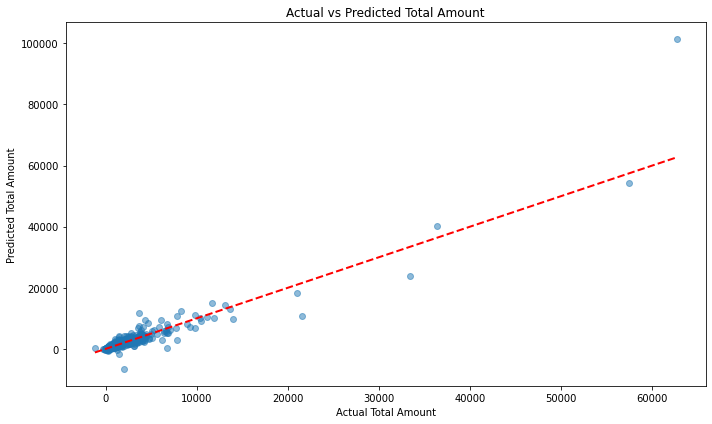

In [47]:
# 9. Visualize actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')
plt.title('Actual vs Predicted Total Amount')
plt.tight_layout()
plt.show()

In [48]:

# First recreate our model and scaler (this needs to be run before the prediction system)
# Prepare features and target
X = customer_metrics[['NumberOfTransactions', 
                     'TotalItems',
                     'AvgItemsPerTransaction',
                     'StdItems',
                     'AvgUnitPrice',
                     'StdUnitPrice']]
y = customer_metrics['TotalAmount']

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Now create the prediction function
def predict_customer_spending(num_transactions, total_items, avg_items_per_trans, std_items, avg_unit_price, std_unit_price):
    # Create a sample customer with all required features
    sample_customer = np.array([[
        num_transactions,
        total_items,
        avg_items_per_trans,
        std_items,
        avg_unit_price,
        std_unit_price
    ]])
    
    # Scale the input using the same scaler used during training
    sample_customer_scaled = scaler.transform(sample_customer)
    
    # Make prediction
    prediction = model.predict(sample_customer_scaled)[0]
    return prediction

print("\nInteractive Prediction System")
print("============================")
print("Please enter the following customer information:")

while True:
    try:
        num_transactions = float(input("\nNumber of transactions: "))
        total_items = float(input("Total items purchased: "))
        avg_items = float(input("Average items per transaction: "))
        std_items = float(input("Standard deviation of items (enter 0 if unknown): "))
        avg_price = float(input("Average unit price: "))
        std_price = float(input("Standard deviation of price (enter 0 if unknown): "))
        
        predicted_spending = predict_customer_spending(
            num_transactions,
            total_items,
            avg_items,
            std_items,
            avg_price,
            std_price
        )
        
        print(f"\nPredicted total spending: £{predicted_spending:.2f}")
        
        another = input("\nWould you like to make another prediction? (yes/no): ")
        if another.lower() != 'yes':
            print("\nThank you for using the Customer Spending Prediction System!")
            break
            
    except ValueError:
        print("\nPlease enter valid numeric values. For example:")
        print("Number of transactions: 5")
        print("Total items: 100")
        print("Average items per transaction: 20")
        print("Standard deviation of items: 5")
        print("Average unit price: 3.50")
        print("Standard deviation of price: 1.2")
    except Exception as e:
        print(f"\nAn error occurred: {e}")


Interactive Prediction System
Please enter the following customer information:


C:\Users\brian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Predicted total spending: £86.57

Thank you for using the Customer Spending Prediction System!
